In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
from sklearn.linear_model import Lasso, Ridge, LinearRegression, LogisticRegression #Lasso回归、岭回归
from sklearn.model_selection import train_test_split #自动进行切割
from sklearn.model_selection import GridSearchCV #表格搜索
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier

In [3]:
data = pd.read_csv("iris.data", header=None)
data

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [4]:
data[4] = pd.Categorical(data[4]).codes #第4列类型转化为编号
data

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [5]:
x, y = np.split(data.values, (4,), axis=1) #表示取左边4列（以列的维度进行数据切割）
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [6]:
y

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],

In [7]:
x = x[:, :2] #左边选择所有行，右边表示选择前2列
x

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6],
       [5.4, 3.9],
       [4.6, 3.4],
       [5. , 3.4],
       [4.4, 2.9],
       [4.9, 3.1],
       [5.4, 3.7],
       [4.8, 3.4],
       [4.8, 3. ],
       [4.3, 3. ],
       [5.8, 4. ],
       [5.7, 4.4],
       [5.4, 3.9],
       [5.1, 3.5],
       [5.7, 3.8],
       [5.1, 3.8],
       [5.4, 3.4],
       [5.1, 3.7],
       [4.6, 3.6],
       [5.1, 3.3],
       [4.8, 3.4],
       [5. , 3. ],
       [5. , 3.4],
       [5.2, 3.5],
       [5.2, 3.4],
       [4.7, 3.2],
       [4.8, 3.1],
       [5.4, 3.4],
       [5.2, 4.1],
       [5.5, 4.2],
       [4.9, 3.1],
       [5. , 3.2],
       [5.5, 3.5],
       [4.9, 3.1],
       [4.4, 3. ],
       [5.1, 3.4],
       [5. , 3.5],
       [4.5, 2.3],
       [4.4, 3.2],
       [5. , 3.5],
       [5.1, 3.8],
       [4.8, 3. ],
       [5.1, 3.8],
       [4.6, 3.2],
       [5.3, 3.7],
       [5. , 3.3],
       [7. , 3.2],
       [6.4, 3.2],
       [6.9,

In [13]:
lr = Pipeline([("sc", StandardScaler()), 
               ("poly", PolynomialFeatures(degree=2)), 
               ("clf", KNeighborsClassifier())]) #处理数据，这里也可以改成KNN或其他模型
lr.fit(x, y.ravel())
y_new = lr.predict(x) #预测数据
np.mean(y_new==y.ravel()) #精确度为82

0.8266666666666667

In [14]:
lr = Pipeline([("sc", StandardScaler()), 
               ("poly", PolynomialFeatures(degree=2)), 
               ("clf", LogisticRegression())]) #处理数据，这里也可以改成KNN或其他模型
lr.fit(x, y.ravel())

Pipeline(memory=None,
     steps=[('sc', StandardScaler(copy=True, with_mean=True, with_std=True)), ('poly', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('clf', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [15]:
y_new = lr.predict(x) #预测数据
np.mean(y_new==y.ravel()) #精确度为81

0.8133333333333334

In [17]:
y_new_prob = lr.predict_proba(x) #预测X
y_new_prob

array([[9.56366485e-01, 2.22972110e-02, 2.13363040e-02],
       [8.21190581e-01, 1.31550215e-01, 4.72592043e-02],
       [9.63458572e-01, 1.84745773e-02, 1.80668511e-02],
       [9.61472191e-01, 1.98062080e-02, 1.87216005e-02],
       [9.81379458e-01, 7.31618691e-03, 1.13043551e-02],
       [9.79139294e-01, 7.70426216e-03, 1.31564438e-02],
       [9.89982000e-01, 2.77249521e-03, 7.24550437e-03],
       [9.52881634e-01, 2.51466676e-02, 2.19716988e-02],
       [9.58175534e-01, 2.18583383e-02, 1.99661273e-02],
       [8.80377503e-01, 8.18071425e-02, 3.78153549e-02],
       [9.47085319e-01, 2.55983657e-02, 2.73163152e-02],
       [9.78245643e-01, 9.07562921e-03, 1.26787275e-02],
       [8.73772247e-01, 8.86747177e-02, 3.75530350e-02],
       [9.81239705e-01, 6.39871292e-03, 1.23615817e-02],
       [9.43323868e-01, 2.08393328e-02, 3.58367991e-02],
       [9.94611075e-01, 1.10841997e-03, 4.28050453e-03],
       [9.79139294e-01, 7.70426216e-03, 1.31564438e-02],
       [9.56366485e-01, 2.22972

No handles with labels found to put in legend.


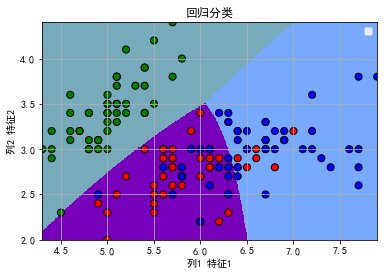

In [22]:
# 绘图
N, M = 500, 500 #横纵数据采样
x1_min, x1_max = x[:, 0].min(), x[:, 0].max() #表示第1列的范围
x2_min, x2_max = x[:, 1].min(), x[:, 1].max() #表示第2列的范围
t1 = np.linspace(x1_min, x1_max, N)
t2 = np.linspace(x2_min, x2_max, M) #数据切割
x1, x2 = np.meshgrid(t1, t2) #生成表格
x_test = np.stack((x1.flat, x2.flat), axis=1) #测试的点
mpl.rcParams['font.sans-serif'] = ['simHei']
mpl.rcParams['axes.unicode_minus'] = False #解决中文乱码
# 两个颜色列表
cmp_light = mpl.colors.ListedColormap(["#77AABB", "#7700BB", "#77AAFF"])
cmp_dark = mpl.colors.ListedColormap(["g", "r", "b"])
y_new = lr.predict(x_test)
y_new = y_new.reshape(x1.shape) #调整形状

plt.figure(facecolor="w")
plt.pcolormesh(x1, x2, y_new, cmap=cmp_light) #预测的绘图
plt.scatter(x[:, 0], x[:, 1], c=np.squeeze(y), edgecolors="k", s=50, cmap=cmp_dark) #绘制样本
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max) #设置边界
plt.xlabel("列1 特征1")
plt.ylabel("列2 特征2")
plt.grid()
plt.legend()
plt.title("回归分类")
plt.show()